# K Means Cluster of Hotels Reviews

## Read the blobs from the knowledge store to create a dataframe
### Extract the pages and flatten the dataframe


In [2]:
from azure.storage.blob import BlockBlobService

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from pandas.io.json import json_normalize
from time import time
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re


STORAGEACCOUNTNAME= 'knowstoredemo'
STORAGEACCOUNTKEY= ''
LOCALFILENAME= 'temp.json'
CONTAINERNAME= 'hotelreviews'
cols_to_del  = ['metadata_storage_content_type', 'metadata_storage_size', 'metadata_storage_path', 'metadata_storage_content_md5', 
             'metadata_storage_last_modified', 'latitude','longitude', 'reviews_date','reviews_dateAdded', 
             'reviews_username', 'metadata_storage_name']

BLOBNAME= ''
big_df = pd.DataFrame()
#download from blob
count = 0
t0 = time()
blob_service=BlockBlobService(account_name=STORAGEACCOUNTNAME,account_key=STORAGEACCOUNTKEY)
blob_names = blob_service.list_blobs(CONTAINERNAME)
for blob in blob_names:
    blob_service.get_blob_to_path(CONTAINERNAME,blob.name,LOCALFILENAME)
    df = pd.read_json(LOCALFILENAME)
    
    
    for col in cols_to_del:
        if col in df.columns:
            del df[col]
    try:
        
        pages = json_normalize(df['pages'])
        df['LanguageCode' ] = pages['LanguageCode']
        df['SentimentScore'] = pages ['SentimentScore']
        #df.drop(['metadata_storage_content_type', 'metadata_storage_size', 'metadata_storage_path', 'metadata_storage_content_md5', 
        #         'metadata_storage_last_modified', 'latitude','longitude', 'reviews_date','reviews_dateAdded', 
        #         'reviews_username', 'metadata_storage_name'],axis=1, inplace=True, sort=False)

        #df1 = df[['address', 'categories', 'city', 'country', 'postalCode', 'province', 'name', 'reviews_rating', 'reviews_text', 'reviews_title', 'pages', 'AzureSearch_DocumentKey']]
        frames = [big_df, df]
        big_df= pd.concat(frames, sort=False)
        count = count+ 1
        if count % 500 == 0:
            
            print("done in %0.3fs." % (time() - t0))
            print(f'Processing {count} documents' )
            
    except:
        print("Exception")
    
        
print(f'Processed {count} documents' )
print(big_df.columns)
print(big_df.shape)

done in 12.931s.
Processing 100 documents
done in 20.954s.
Processing 200 documents
done in 29.365s.
Processing 300 documents
done in 37.923s.
Processing 400 documents
done in 45.912s.
Processing 500 documents
done in 54.403s.
Processing 600 documents
done in 62.624s.
Processing 700 documents
done in 70.822s.
Processing 800 documents
done in 79.665s.
Processing 900 documents
done in 88.564s.
Processing 1000 documents
done in 97.432s.
Processing 1100 documents
done in 106.780s.
Processing 1200 documents
done in 115.051s.
Processing 1300 documents
done in 123.568s.
Processing 1400 documents
done in 132.209s.
Processing 1500 documents
done in 140.580s.
Processing 1600 documents
done in 149.357s.
Processing 1700 documents
done in 158.622s.
Processing 1800 documents
done in 167.156s.
Processing 1900 documents
done in 175.650s.
Processing 2000 documents
done in 184.194s.
Processing 2100 documents
done in 192.743s.
Processing 2200 documents
done in 201.352s.
Processing 2300 documents
done in 

### Peek at the first 5 records to validate the data looks as expected

In [4]:
big_df.head()



,address,categories,city,country,name,postalCode,province,reviews_rating,reviews_text,reviews_title,AzureSearch_DocumentKey,pages,LanguageCode,SentimentScore
0,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,4.0,"Bardzo sympatyczna obsuga, klimat hotelu. wiet...",Tip top,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['sympatyczna obsuga', 'klimat ...",pl,1.000000
0,1700 N Livermore Ave,Hotels,Livermore,US,Hawthorn Suites By Wyndham Livermore Wine Country,94551,CA,5.0,I have stayed here twice now and loved it both...,Dirty room,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['pool', 'great time', 'Staff',...",en,0.980587
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,Learn the tunnels. Best way to the dining room,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['Best way', 'dining room', 'tu...",en,0.866199
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,this place is creepy. weird tunnels and steril...,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['weird tunnels', 'sterile room...",en,0.075259
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,Just follow the signs. It's a lot more simple ...,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['lot', 'signs'], 'LanguageCode...",en,0.904357


## K-Means 
  * Remove stop words
  * Build a TFIDF vector
  * Randomly Initialize Centroids
  * Run - Train over a number of iterations to minimize loss
    

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = big_df['reviews_text']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [6]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model Complete")
        return self   

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model Complete


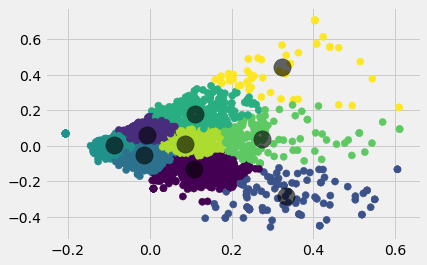

In [7]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(9, 1, 1000)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

### Add the Centroids to the dataframe. 
### Save Dataframe as CSV file

In [8]:
big_df['centroid'] = predicted_values

In [16]:
file_name = "centroid.csv"
container_name = "enriched"
big_df.to_csv(path_or_buf=file_name, index=True)
blob_service.create_container(container_name)

# Upload the created file, use local_file_name for the blob name.
blob_service.create_blob_from_path(
    container_name, file_name, file_name)

print("You have successfully clustered the reviews based on the review text and added the centroid file to the enriched container in the knowledge store")


You have successfully clustered the reviews based on the review text and added the centroid file to the enriched container in the knowledge store
